In [142]:
# from network import Network
from get_config import get_config
from dataloader.as_dataloader import get_as_dataloader
from get_model import get_model
import os
import numpy as np
import torch
import wandb

config = get_config()


model = get_model(config)

dataloader_tr = get_as_dataloader(config, split='train', mode='train')
dataloader_va = get_as_dataloader(config, split='val', mode='val')


The number of parameters in r2plus1d_18:  31302.18k


In [2]:
from ResNetAE.ResNetAE import ResNetAE
import torch
import torch.nn as nn
# ResnetAE
emb_dim = 1024
model_AE = ResNetAE(input_shape=(224, 224, 3), n_ResidualBlock=8, n_levels=4, bottleneck_dim=emb_dim)
model_AE.decoder = None
model_AE.fc2 = None

In [3]:
from pathlib import Path
checkpoint = torch.load(Path('/AS_clean/FTC/logs/resnetae/best_model_cont.pth'))
prefix = 'module.model.'
n_clip = len(prefix)
adapted_dict = {k[n_clip:]: v for k, v in checkpoint["model"].items()
                if k.startswith(prefix)}
model_AE.load_state_dict(adapted_dict, strict=False)

<All keys matched successfully>

In [143]:
import torchvision
import torch
import torch.nn as nn
model = torchvision.models.resnet18()
dim_in = model.fc.in_features
model.fc =  nn.Linear(dim_in, 1024)
from pathlib import Path
checkpoint = torch.load(Path('/AS_clean/FTC/logs/resnet18/best_model_cont.pth'))
prefix = 'module.model.'
n_clip = len(prefix)
adapted_dict = {k[n_clip:]: v for k, v in checkpoint["model"].items()
                if k.startswith(prefix)}
model.load_state_dict(adapted_dict, strict=False)

<All keys matched successfully>

In [144]:
model_AE = model

In [145]:
video,as_label,_ = next(iter(dataloader_tr))
video = video.permute(0,2,1,3,4)
nB, nF, nC, nH, nW = video.shape
# Merge batch and frames dimension
video = video.contiguous().view(nB*nF,nC,nH,nW)
video = video.cuda()
video.shape

torch.Size([128, 3, 224, 224])

In [146]:
model_AE = model_AE.cuda()
x = video
embeddings = model_AE(x).squeeze()
embeddings = torch.nn.functional.normalize(embeddings, dim=0)
embeddings.shape

torch.Size([128, 1024])

In [147]:
a= torch.norm(embeddings,dim =1 )

In [167]:
import torch
import torch.nn.functional as F
similarity = np.zeros([16,16])
s = 48
e = s+16
for i in range(s,e,1):
    for j in range(s,e,1):
        similarity[i-s,j-s] = F.cosine_similarity(embeddings[i], embeddings[j], dim =0)

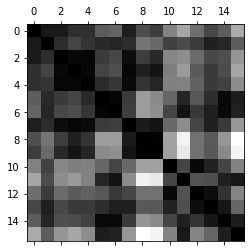

In [168]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.matshow(similarity, cmap=plt.cm.Greys)

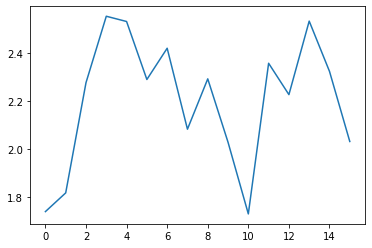

In [169]:
import matplotlib.pyplot as plt
plt.plot(a[s:e].cpu().detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

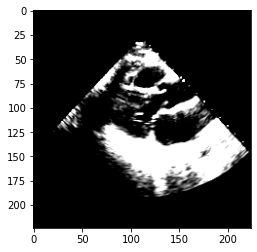

In [170]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()
frames = [[ax.imshow(video[s].cpu().permute(1,2,0))] for s in range(s,e,1)]
ani = animation.ArtistAnimation(fig, frames)
ani
#writergif = animation.PillowWriter(fps=30)
#ani.save('Videos/Tricuspid.gif',writer=writergif)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


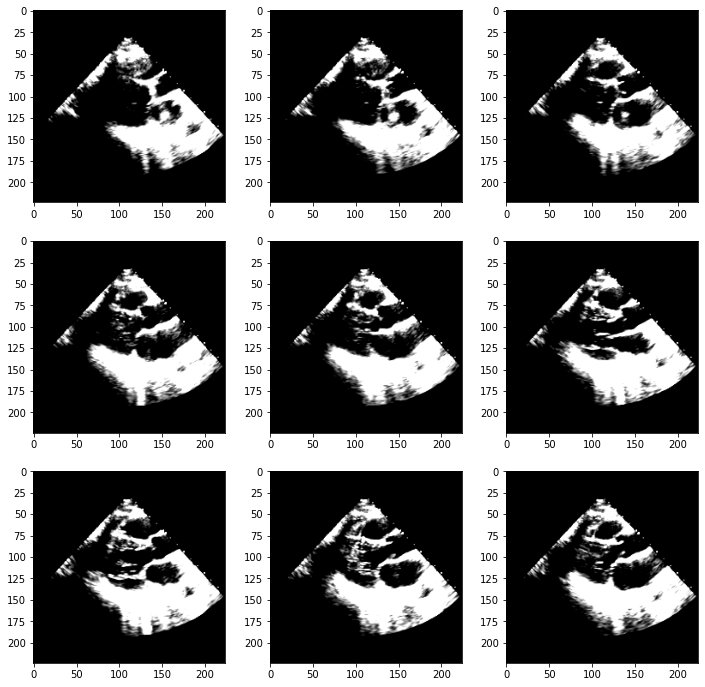

In [171]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

f, axarr = plt.subplots(3,3,figsize=(12, 12))
axarr[0,0].imshow(video[s].cpu().permute(1,2,0))
axarr[0,1].imshow(video[s+2].cpu().permute(1,2,0))
axarr[0,2].imshow(video[s+4].cpu().permute(1,2,0))
axarr[1,0].imshow(video[s+6].cpu().permute(1,2,0))
axarr[1,1].imshow(video[s+7].cpu().permute(1,2,0))
axarr[1,2].imshow(video[s+9].cpu().permute(1,2,0))
axarr[2,0].imshow(video[s+10].cpu().permute(1,2,0))
axarr[2,1].imshow(video[s+12].cpu().permute(1,2,0))
axarr[2,2].imshow(video[s+15].cpu().permute(1,2,0))

In [3]:
from ResNetAE.ResNetAE import ResNetAE
import torch
import torch.nn as nn
# ResnetAE
emb_dim = 1024
model_AE = ResNetAE(input_shape=(224, 224, 3), n_ResidualBlock=8, n_levels=4, bottleneck_dim=emb_dim)
model_AE.decoder = None
model_AE.fc2 = None
model_AE = model_AE.cuda()


## BERT Model
from transformers import BertConfig, BertModel
num_hidden_layers = 16
intermediate_size = 8192
rm_branch = None
use_conv = False
attention_heads=16
configuration = BertConfig(
    vocab_size=1, # Set to 0/None ?
    hidden_size=emb_dim, # Length of embeddings
    num_hidden_layers=num_hidden_layers, # 16
    num_attention_heads=attention_heads, 
    intermediate_size=intermediate_size, # 8192
    hidden_act='gelu', 
    hidden_dropout_prob=0.1, 
    attention_probs_dropout_prob=0.1, 
    max_position_embeddings=1024, # 64 ?
    type_vocab_size=1, 
    initializer_range=0.02, 
    layer_norm_eps=1e-12, 
    pad_token_id=0, 
    gradient_checkpointing=False, 
    position_embedding_type='absolute', 
    use_cache=True)
configuration.num_labels = 4 # 4

model_T  = BertModel(configuration).encoder
model_T.cuda()
class Reduce(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,x):
        x = torch.flatten(x, start_dim=1)
        x = x.mean(dim=1)
        return x
    
embedding_dim = 1024
aorticstenosispred = nn.Sequential(
            nn.Linear(in_features=embedding_dim, out_features=embedding_dim//2, bias=True),
            nn.LayerNorm(embedding_dim//2),
            nn.LeakyReLU(negative_slope=0.05, inplace=True),
            nn.Linear(in_features=embedding_dim//2, out_features=4, bias=True),
            Reduce(),
            )
aorticstenosispred.cuda()

Sequential(
  (0): Linear(in_features=1024, out_features=512, bias=True)
  (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (2): LeakyReLU(negative_slope=0.05, inplace=True)
  (3): Linear(in_features=512, out_features=4, bias=True)
  (4): Reduce()
)

In [4]:
video,as_label,_ = next(iter(dataloader_tr))
video = video.permute(0,2,1,3,4)
nB, nF, nC, nH, nW = video.shape
# Merge batch and frames dimension
video = video.contiguous().view(nB*nF,nC,nH,nW)
video = video.cuda()
video.shape

torch.Size([128, 3, 224, 224])

In [5]:
# Forward section of FTC
# (BxF) x C x H x W => (BxF) x Emb
x = video
embeddings = model_AE.encode(x).squeeze()
embeddings.shape

torch.Size([128, 1024])

In [10]:
# B x F x Emb => AttHeads+1 x B x F x Emb
outputs = model_T (embeddings.view(-1, nF, embedding_dim), output_hidden_states=True)
print(outputs.hidden_states[0].shape)
outputs = torch.stack(outputs.hidden_states).mean(dim=0)
print(outputs.shape)

torch.Size([8, 16, 1024])
torch.Size([8, 16, 1024])


In [17]:
aorticstenosispred = nn.Sequential(
            nn.Linear(in_features=embedding_dim, out_features=embedding_dim//2, bias=True),
            nn.LayerNorm(embedding_dim//2),
            nn.LeakyReLU(negative_slope=0.05, inplace=True),
            nn.Linear(in_features=embedding_dim//2, out_features=4, bias=True),
            nn.Softmax(dim=2) 
            )
aorticstenosispred.cuda()
x = aorticstenosispred(outputs)
print(x)
x = x.mean(dim=1)
x

tensor([[[0.1948, 0.1703, 0.3449, 0.2900],
         [0.2164, 0.1878, 0.3009, 0.2950],
         [0.2685, 0.1375, 0.3518, 0.2422],
         [0.2567, 0.1508, 0.3032, 0.2893],
         [0.2634, 0.1667, 0.2938, 0.2760],
         [0.2496, 0.1356, 0.3631, 0.2517],
         [0.2716, 0.1697, 0.1848, 0.3739],
         [0.2457, 0.1636, 0.2497, 0.3410],
         [0.2452, 0.1404, 0.2456, 0.3687],
         [0.2353, 0.1145, 0.2492, 0.4010],
         [0.2960, 0.1010, 0.2404, 0.3626],
         [0.2308, 0.1507, 0.2707, 0.3478],
         [0.2094, 0.1986, 0.2077, 0.3842],
         [0.2552, 0.1357, 0.4030, 0.2060],
         [0.2703, 0.1305, 0.3984, 0.2008],
         [0.2093, 0.1933, 0.3526, 0.2447]],

        [[0.1277, 0.1384, 0.3380, 0.3960],
         [0.1800, 0.1265, 0.2946, 0.3989],
         [0.1637, 0.0959, 0.3590, 0.3814],
         [0.1708, 0.1736, 0.3075, 0.3481],
         [0.1478, 0.1762, 0.3099, 0.3661],
         [0.1862, 0.1759, 0.2729, 0.3651],
         [0.1787, 0.1163, 0.2661, 0.4389],
         

tensor([[0.2449, 0.1529, 0.2975, 0.3047],
        [0.1959, 0.1476, 0.2983, 0.3582],
        [0.2309, 0.1603, 0.3519, 0.2569],
        [0.2756, 0.1532, 0.3276, 0.2436],
        [0.2260, 0.1882, 0.3228, 0.2630],
        [0.2450, 0.1752, 0.2651, 0.3147],
        [0.2827, 0.1618, 0.2956, 0.2599],
        [0.2580, 0.1678, 0.2698, 0.3044]], device='cuda:0',
       grad_fn=<MeanBackward1>)

In [14]:
x = torch.flatten(x, start_dim=1)
x.shape

torch.Size([8, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


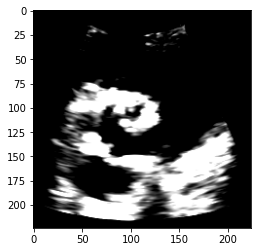

In [15]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
plt.imshow(video_test[0].permute(1,2,0))

In [2]:
from torchvision.models.video import r2plus1d_18
import torch.nn as nn
import torch.nn.functional as F
class Linear(nn.Module):
    """backbone + projection head"""
    def __init__(self, name='r2plus1d_18', nc=4):
        super(Linear, self).__init__()
        self.model = r2plus1d_18(pretrained=False, num_classes=nc)
        for param in self.model.parameters():
            param.requires_grad = False
        self.model.fc.requires_grad = True
    def forward(self, x):
        feat = self.model(x)
        return feat
model = Linear(nc = 4)

In [4]:
import torch
from pathlib import Path
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
checkpoint = torch.load(Path('/AS_Neda/AS_thesis/logs/peachy-bird-14/best_model_cont.pth'))
model.load_state_dict(checkpoint["model"], strict=False)

_IncompatibleKeys(missing_keys=['model.fc.weight', 'model.fc.bias'], unexpected_keys=['model.fc.0.weight', 'model.fc.0.bias', 'model.fc.2.weight', 'model.fc.2.bias'])

In [1]:
from network import Network
from get_config import get_config
from dataloader.as_dataloader_revision import get_as_dataloader
from get_model import get_model
import os
import numpy as np
import torch
import wandb
from pathlib import Path
os.environ["CUDA_VISIBLE_DEVICES"] = "4,5"
config = get_config()

model = get_model(config)
if True:
    pt_file =Path('/AS_Neda/AS_thesis/logs/peachy-bird-14/best_model_cont.pth')
    print(f"restoring {pt_file}")

    # Read checkpoint file.
    load_res = torch.load(pt_file)
    # Loading model.
    model.load_state_dict(load_res["model"],strict=True)

The number of parameters in r2plus1d_18:  31628.44k
restoring /AS_Neda/AS_thesis/logs/peachy-bird-14/best_model_cont.pth


In [9]:
config_c = config.copy()

In [10]:
config_c['cotrastive_method'] = 'l'

'CE'

In [2]:
if config['use_cuda']:    
    if torch.cuda.device_count() > 1:
        model = torch.nn.DataParallel(model)
    model.cuda()

In [3]:
def compute_embeddings(loader, model, embed_dim):
    # note that it's okay to do len(loader) * bs, since drop_last=True is enabled
    total_embeddings = np.zeros((len(loader)*loader.batch_size, embed_dim))
    total_labels = np.zeros(len(loader)*loader.batch_size)

    for idx, (cine, labels,_) in enumerate(loader):
        cine = cine.cuda()
        bsz = labels.shape[0]

        embed = model(cine)
        total_embeddings[idx * bsz: (idx + 1) * bsz] = embed.detach().cpu().numpy()
        total_labels[idx * bsz: (idx + 1) * bsz] = labels.detach().numpy()

        del cine, labels, embed
        torch.cuda.empty_cache()

    return np.float32(total_embeddings), total_labels.astype(int)

In [6]:
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
def validation_constructive(valid_loader, train_loader, model,config):
    calculator = AccuracyCalculator(k=1)
    model.eval()
    
    query_embeddings, query_labels = compute_embeddings(valid_loader, model,config['feature_dim'])
    print('Done')
    reference_embeddings, reference_labels = compute_embeddings(train_loader, model,config['feature_dim'])
    print('Done_2')
    acc_dict = calculator.get_accuracy(
        query_embeddings,
        reference_embeddings,
        query_labels,
        reference_labels,
        embeddings_come_from_same_source=False
    )

    del query_embeddings, query_labels, reference_embeddings, reference_labels
    torch.cuda.empty_cache()

    return acc_dict

In [7]:
acc = validation_constructive(dataloader_va, dataloader_tr_feat,model,config)

Done



If you're looking for MAP@1 instead of MAP@R, then you should use 'mean_average_precision' rather than mean_average_precision_at_r


Done_2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [12]:
acc

{'AMI': 0.05320419451257367,
 'NMI': 0.05666378817079115,
 'mean_average_precision': 0.34035087719298246,
 'mean_average_precision_at_r': 0.34035087719298246,
 'mean_reciprocal_rank': 0.3403508961200714,
 'precision_at_1': 0.34035087719298246,
 'r_precision': 0.34035087719298246}

In [ ]:
from torchvision.models.video import r2plus1d_18
import torch.nn as nn
model = r2plus1d_18(pretrained=False, num_classes=4)

In [9]:
feat_dim = 128
model.fc = nn.Sequential(
                nn.Linear(model.fc.in_features, model.fc.in_features),
                nn.ReLU(inplace=True),
                nn.Linear(model.fc.in_features, feat_dim)
            )

In [1]:
from network import Network
from get_config import get_config
from dataloader.as_dataloader_revision import get_as_dataloader,AorticStenosisDataset
from get_model import get_model
config = get_config()
model = get_model(config)
dataloader_tr = get_as_dataloader(config, split='train', mode='train')

The number of parameters in r2plus1d_18:  31302.18k


In [4]:
for name, module in model.named_modules():
    print(name)


stem
stem.0
stem.1
stem.2
stem.3
stem.4
stem.5
layer1
layer1.0
layer1.0.conv1
layer1.0.conv1.0
layer1.0.conv1.0.0
layer1.0.conv1.0.1
layer1.0.conv1.0.2
layer1.0.conv1.0.3
layer1.0.conv1.1
layer1.0.conv1.2
layer1.0.conv2
layer1.0.conv2.0
layer1.0.conv2.0.0
layer1.0.conv2.0.1
layer1.0.conv2.0.2
layer1.0.conv2.0.3
layer1.0.conv2.1
layer1.0.relu
layer1.1
layer1.1.conv1
layer1.1.conv1.0
layer1.1.conv1.0.0
layer1.1.conv1.0.1
layer1.1.conv1.0.2
layer1.1.conv1.0.3
layer1.1.conv1.1
layer1.1.conv1.2
layer1.1.conv2
layer1.1.conv2.0
layer1.1.conv2.0.0
layer1.1.conv2.0.1
layer1.1.conv2.0.2
layer1.1.conv2.0.3
layer1.1.conv2.1
layer1.1.relu
layer2
layer2.0
layer2.0.conv1
layer2.0.conv1.0
layer2.0.conv1.0.0
layer2.0.conv1.0.1
layer2.0.conv1.0.2
layer2.0.conv1.0.3
layer2.0.conv1.1
layer2.0.conv1.2
layer2.0.conv2
layer2.0.conv2.0
layer2.0.conv2.0.0
layer2.0.conv2.0.1
layer2.0.conv2.0.2
layer2.0.conv2.0.3
layer2.0.conv2.1
layer2.0.relu
layer2.0.downsample
layer2.0.downsample.0
layer2.0.downsample.1
laye

In [2]:
images,labelsa,labelsb =next(iter(dataloader_tr))

In [5]:
category_to_label = {0: 'Normal', 1:'Mild', 2:'Moderate', 3:'Severe'}
category_to_label.get(0)

'Normal'

In [3]:
import torch
images = torch.cat([images[0], images[1]], dim=0)

In [4]:
features = model(images)

In [7]:
bsz = labelsa.shape[0]
f1, f2 = torch.split(features, [bsz, bsz], dim=0)
features = torch.cat([f1.unsqueeze(1), f2.unsqueeze(1)], dim=1)

In [11]:
features.shape

torch.Size([4, 2, 64])

In [12]:
labelsa

tensor([1, 2, 2, 0])

In [14]:
labels = labelsa.contiguous().view(-1, 1)
print(labels)
mask = torch.eq(labels, labels.T).float()
print(mask)

tensor([[1],
        [2],
        [2],
        [0]])
tensor([[1., 0., 0., 0.],
        [0., 1., 1., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 1.]])


In [17]:
contrast_count = features.shape[1]
contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)

In [18]:
contrast_feature.shape

torch.Size([8, 64])

In [19]:
anchor_feature = contrast_feature
anchor_count = contrast_count

In [20]:
# compute logits
anchor_dot_contrast = torch.div(
    torch.matmul(anchor_feature, contrast_feature.T),
    0.1)


In [23]:
# for numerical stability
logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
logits = anchor_dot_contrast - logits_max.detach()

In [25]:
logits_max

tensor([[10.0000],
        [10.0000],
        [10.0000],
        [10.0000],
        [10.0000],
        [10.0000],
        [10.0000],
        [10.0000]], grad_fn=<MaxBackward0>)

In [2]:
droot = r"../as_tom"

flip=config['flip_rate']
tra = True
bsize = config['batch_size']
show_info = False
fr = 16
dset = AorticStenosisDataset(dataset_root=droot, 
                            split='train',
                            view=config['view'],
                            transform=tra,
                            normalize=True,
                            frames=fr,
                            return_info=show_info,
                            flip_rate=flip,
                            label_scheme_name=config['label_scheme_name'])

In [5]:
cine, labels_AS, labels_B = dset[570]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

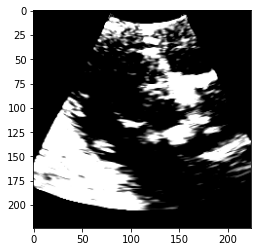

In [6]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()
imgs = cine.permute(1,2,3,0)
frames = [[ax.imshow(imgs[i])] for i in range(len(imgs))]
ani = animation.ArtistAnimation(fig, frames)
ani
#writergif = animation.PillowWriter(fps=30)
#ani.save('Videos/Tricuspid.gif',writer=writergif)


In [7]:
cine.shape

torch.Size([3, 16, 224, 224])

In [15]:
import torch.nn as nn
upsample = nn.Upsample(size=(16,224, 224), mode='nearest')
cine_vid = cine[:, :,  0:180, 40:180].unsqueeze(1)
cine_vid = upsample(cine_vid).squeeze(1)

In [16]:
cine_vid.shape

torch.Size([3, 16, 224, 224])

In [ ]:
transforms.RandomApply([
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.1)
], p=0.8),

In [1]:
from network import Network
from get_config import get_config
from dataloader.as_dataloader_revision import get_as_dataloader
from get_model import get_model
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
config = get_config()
dataloader_tr = get_as_dataloader(config, split='train', mode='train')
dataloader_va = get_as_dataloader(config, split='val', mode='val')

In [2]:
cine,_,_ = next(iter(dataloader_tr))

In [4]:
len(cine[0])

4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

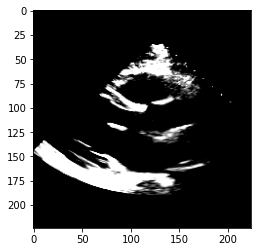

In [7]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

cine_vid = cine[0][1]
fig, ax = plt.subplots()
imgs = cine_vid.permute(1,2,3,0)
frames = [[ax.imshow(imgs[i])] for i in range(len(imgs))]
ani = animation.ArtistAnimation(fig, frames)
ani

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

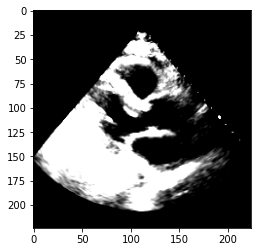

In [8]:
cine_vid = cine[1][2]
fig, ax = plt.subplots()
imgs = cine_vid.permute(1,2,3,0)
frames = [[ax.imshow(imgs[i])] for i in range(len(imgs))]
ani = animation.ArtistAnimation(fig, frames)
ani

In [6]:
from uncertainty import Network
from get_config import get_config
from dataloader.as_dataloader import get_as_dataloader
from get_model import get_model
import os
from utils import validation_constructive
import os
import torch
import wandb
import torch.nn.functional as F
import numpy as np
import pandas as pd
from utils import validation_constructive
from pathlib import Path

In [7]:
config = get_config()

model = get_model(config)
net = Network(model, config)
net.model_initialization(Path('/AS_clean/AS_thesis/bestlogs/all_data_dgx/best_model.pth'))

dataloader_tr = get_as_dataloader(config, split='train', mode='test')
dataloader_va = get_as_dataloader(config, split='val', mode='test')
dataloader_te = get_as_dataloader(config, split='test', mode='test')

The number of parameters in r2plus1d_18:  31302.18k
1
restoring /AS_clean/AS_thesis/bestlogs/all_data_dgx/best_model.pth


In [8]:
# Building the GMM model
print("GMM Model, Getting train embeddings")
embeddings, labels = net.info_extractor(dataloader_va, mode="test",info = 'embedding' ,record_embeddings=True)

  0%|          | 0/1140 [00:00<?, ?it/s]

GMM Model, Getting train embeddings
NOTE: test_comprehensive mode uses batch_size=1 to correctly display metadata


100%|██████████| 1140/1140 [03:42<00:00,  5.12it/s]


In [9]:
# Import GMM utils
from DDU.utils.gmm_utils import get_embeddings, gmm_evaluate, gmm_fit
gaussians_model, jitter_eps = gmm_fit(embeddings=torch.tensor(embeddings), labels=torch.tensor(labels), num_classes=4)

tensor([[1.4959, 1.2825, 1.2045,  ..., 1.1498, 1.0748, 0.3957],
        [0.8282, 1.0263, 0.6755,  ..., 0.7709, 0.7612, 0.3824],
        [0.5568, 0.8554, 0.5768,  ..., 0.5274, 0.7967, 0.5001],
        [0.3211, 0.6443, 0.6115,  ..., 0.3278, 0.9190, 0.7294]])


In [10]:
from uncertainty import TransformerFeatureMap

In [13]:
 gaussians_model

TypeError: cannot unpack non-iterable MultivariateNormal object

In [15]:
data, label, _ , _ ,_  = next(iter(dataloader_te))
data = data
label = label.cuda()

In [20]:
embedding = embeddings[0]

(512,)

In [5]:
logit = gaussians_model.log_prob(torch.tensor(embeddings[20]))
logit - logit.min

TypeError: unsupported operand type(s) for -: 'Tensor' and 'builtin_function_or_method'

In [28]:
torch.logsumexp(logit, dim=-1)

tensor(1779.0378)

In [20]:
import torch
a = torch.tensor([[1,3,5,2,8],[2,4,7,2,6]])
a.shape

torch.Size([2, 5])

In [21]:
b = torch.ones([2,10])
b[:,1] = b[:,1]+1
b[:,2] = b[:,2]+2
b[:,3] = b[:,3]+3
b[:,4] = b[:,4]+4
b[:,5] = b[:,5]+5
b[:,6] = b[:,6]+6
b[:,7] = b[:,7]+7
b[:,8] = b[:,8]+8
b[:,9] = b[:,9]+9
b[1,:] = b[1,:]+2

In [22]:
b

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [25]:
index = torch.tensor([0, 1])
b.gather(1,a)

tensor([[ 2.,  4.,  6.,  3.,  9.],
        [ 5.,  7., 10.,  5.,  9.]])

In [17]:
t

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])